In [105]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [106]:
import tensorflow as tf

In [107]:
from tensorflow import keras

In [108]:
tf.__version__

'2.7.0'

In [109]:
keras.__version__

'2.7.0'

#**10.1 생물학적 뉴런에서 인공 뉴런까지**

In [110]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

In [111]:
per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])
y_pred

array([0])

# **10.2 케라스로 다층 퍼셉트론 구현하기**

In [135]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [136]:
X_train_full.shape

(60000, 28, 28)

In [137]:
X_train_full.dtype


dtype('uint8')

In [138]:
#검증세트 만들기
#스케일 조정 

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

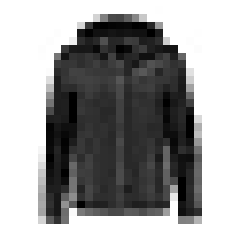

In [116]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [117]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [118]:
class_names[y_train[0]]

'Coat'

Saving figure fashion_mnist_plot


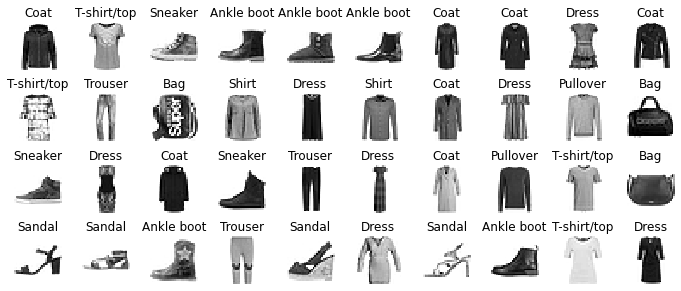

In [119]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [139]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [140]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [141]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [123]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.layers

In [142]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [143]:
model.get_layer(hidden1.name) is hidden1

True

In [144]:
weights, biases = hidden1.get_weights()

In [128]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [129]:
weights.shape #(784 300)

(784, 300)

In [130]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [131]:
biases.shape

(300,)

In [145]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [146]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy:

In [148]:
history.history

{'accuracy': [0.7643091082572937,
  0.831781804561615,
  0.8456545472145081,
  0.8563636541366577,
  0.8616363406181335,
  0.8677818179130554,
  0.8715272545814514,
  0.8752181529998779,
  0.8791999816894531,
  0.8822181820869446,
  0.8838000297546387,
  0.8866727352142334,
  0.8893818259239197,
  0.8915091156959534,
  0.8938363790512085,
  0.8969636559486389,
  0.8981454372406006,
  0.9000727534294128,
  0.902472734451294,
  0.9037272930145264,
  0.9059090614318848,
  0.9075272679328918,
  0.9083636403083801,
  0.9100000262260437,
  0.9124181866645813,
  0.9137272834777832,
  0.9154909253120422,
  0.9166363477706909,
  0.9188545346260071,
  0.9198727011680603],
 'loss': [0.7237027883529663,
  0.484192818403244,
  0.4390534460544586,
  0.41231462359428406,
  0.3939222991466522,
  0.3750678300857544,
  0.3630312979221344,
  0.35152509808540344,
  0.3412765860557556,
  0.3317754566669464,
  0.3238329291343689,
  0.3146835267543793,
  0.30778029561042786,
  0.30192798376083374,
  0.294391

Saving figure keras_learning_curves_plot


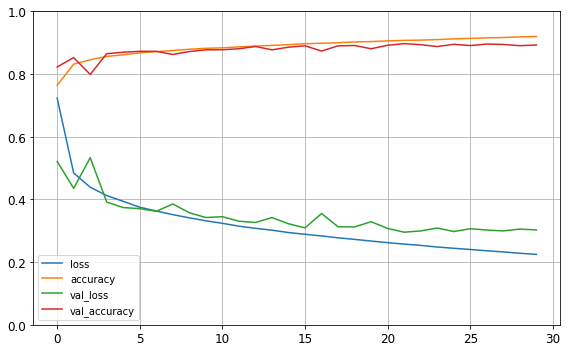

In [147]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [149]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8820


[0.3366333842277527, 0.8820000290870667]

In [150]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [152]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [153]:
#캘리포니아 주택 가격 데이터셋 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [154]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8376 - val_loss: 1.0720
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6953 - val_loss: 0.6397
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6373 - val_loss: 0.5960
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6050 - val_loss: 0.5744
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5785 - val_loss: 0.5613
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5558 - val_loss: 0.5296
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5369 - val_loss: 0.5063
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5214 - val_loss: 0.5133
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5074 - val_loss: 0.4940
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4956 - val_loss: 0.4764

In [158]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [159]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1011 - val_loss: 0.8655
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6608 - val_loss: 0.7061
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6063 - val_loss: 0.5651
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5657 - val_loss: 0.6471
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5374 - val_loss: 0.6372
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5127 - val_loss: 0.4727
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4949 - val_loss: 0.4550
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4799 - val_loss: 0.6968
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4665 - val_loss: 0.4299
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4572 - val_loss: 0.4284

In [161]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [162]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2818 - val_loss: 1.2138
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7429 - val_loss: 0.6835
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6373 - val_loss: 0.5867
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6017 - val_loss: 0.5595
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5788 - val_loss: 0.5361
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5577 - val_loss: 0.5175
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5407 - val_loss: 0.5020
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5249 - val_loss: 0.4865
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5107 - val_loss: 0.4730
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4988 - val_loss: 0.4624

In [164]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [165]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [166]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.5325 - main_output_loss: 2.2137 - aux_output_loss: 5.4023 - val_loss: 1.3763 - val_main_output_loss: 1.0815 - val_aux_output_loss: 4.0296
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1018 - main_output_loss: 0.8430 - aux_output_loss: 3.4311 - val_loss: 1.1603 - val_main_output_loss: 0.8456 - val_aux_output_loss: 3.9920
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9237 - main_output_loss: 0.7535 - aux_output_loss: 2.4548 - val_loss: 1.0302 - val_main_output_loss: 0.7019 - val_aux_output_loss: 3.9855
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8265 - main_output_loss: 0.7030 - aux_output_loss: 1.9380 - val_loss: 1.0278 - val_main_output_loss: 0.6533 - val_aux_output_loss: 4.3984
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7659 - main_output_loss: 0.6658 - aux_output_loss: 1.6668 - val_loss

In [167]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.4689 - main_output_loss: 0.4290 - aux_output_loss: 0.8285


In [168]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [170]:
y_pred_main, y_pred_aux

(array([[0.6062988],
        [1.8906484],
        [3.0471652]], dtype=float32), array([[1.267282 ],
        [2.1773834],
        [2.786763 ]], dtype=float32))

In [171]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [172]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.6575 - output_1_loss: 2.4589 - output_2_loss: 4.4454 - val_loss: 1.4307 - val_output_1_loss: 1.1811 - val_output_2_loss: 3.6776
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0179 - output_1_loss: 0.7781 - output_2_loss: 3.1764 - val_loss: 0.9831 - val_output_1_loss: 0.8103 - val_output_2_loss: 2.5383
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8396 - output_1_loss: 0.6824 - output_2_loss: 2.2551 - val_loss: 0.7950 - val_output_1_loss: 0.6620 - val_output_2_loss: 1.9921
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7484 - output_1_loss: 0.6358 - output_2_loss: 1.7611 - val_loss: 0.7213 - val_output_1_loss: 0.6095 - val_output_2_loss: 1.7268
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6926 - output_1_loss: 0.6030 - output_2_loss: 1.4994 - val_loss: 0.6646 - val_output_1_loss: 0.5634 - val_ou

In [173]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [175]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3757 - val_loss: 1.3682
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7501 - val_loss: 0.7196
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6959 - val_loss: 0.6805
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6552 - val_loss: 0.6358
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6204 - val_loss: 0.5953
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5874 - val_loss: 0.5621
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5594 - val_loss: 0.5389
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5334 - val_loss: 0.5089
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5087 - val_loss: 0.4842
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4698


In [176]:
model.save("my_keras_model.h5")

In [177]:
model = keras.models.load_model("my_keras_model.h5")

In [178]:
model.predict(X_new)

array([[0.8982209],
       [1.3487475],
       [2.937217 ]], dtype=float32)

In [179]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [180]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [181]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [182]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3976 - val_lo

In [183]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [184]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

347/363 [===========================>..] - ETA: 0s - loss: 0.3270
val/train: 1.08
363/363 [==============================] - 1s 2ms/step - loss: 0.3302 - val_loss: 0.3561


In [186]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_01_20-13_47_25'

In [187]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [189]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3731 - val_loss: 0.3525
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3714 - val_loss: 0.3572
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3700 - val_loss: 0.3500
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3685 - val_loss: 0.3481
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3671 - val_loss: 0.3531
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - val_loss: 0.3532
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3646 - val_loss: 0.3489
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3635 - val_loss: 0.3480
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3624 - val_loss: 0.3563
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3612 - val_loss: 0.3550

In [190]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.

